# Tier 2 E&M Lab: Faraday's Law
_by Stephanie Bie and Andrew Flury_

## Overview
The goal of this lab was to experiment with electromagnetic induction, specifically the physics of Faraday’s law. We began by testing Faraday’s law directly using an IOLab, measuring the magnetic field of various magnets and the current flowing through a loop of wire, amplified by the IOLab’s high gain. We tested Faraday’s law in three set ups, and then observed and took notes on the eddy current effect, using a soda can and spring. Finally, we used electromagnetic induction and the Lorentz force to build a simple motor with a coil, battery, and magnets.

## Equipment
- iOLab
- Spring
- Neodymium magnets (one large black, one wrapped in white paper, one glued to corkboard)
- 26 AWG copper wire
- Meter stick
- Aluminum can (Coca-Cola)
- Spring mass basket
- Two paperclips
- Wiring with minigrabbers
- 9V battery
- Masking tape
- Software (IOLab software, Jupyter Notebook (Python 3))

## Theory
*Faraday’s Law* states that the change in magnetic flux through a single loop will produce an electromotive force (voltage).

*Eddy currents* are loops of currents inside a conductor induced by a changing magnetic field. These loops of current in turn generate a magnetic field, whose first derivative will be opposite that of the original change in magnetic field (e.g. a decreasing magnetic field will generate an eddy whose magnetic field is increasing). This is known as *Lenz’s law*. If the change in magnetic field is due to relative motion between a conductor and a magnet, then a *Lorentz force* will oppose the motion of the conductor (this is what we attempted to observe in setup 4 of the lab).

The Lorentz force can also be used to drive a motor. By placing a coil in a magnetic field and running a current through said coil, a magnetic force, $F$, is generated that will generate torque about the axis of the motor. As is obvious from the formula,
$$F = qv \times B$$
the torque can be increased by increasing the magnetic field the coil is in or by increasing the voltage (and thus, the current) of the circuit. (We ultimately used both facts while troubleshooting our motor.)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

## Data Collection

In [4]:
# Raw Data
# (name formatting: [name][setup #]_[trial #])_data

# Setup 1
time1_1_data, bz1_1_data, voltage1_1_data = np.loadtxt('faraday_case1_trial1.csv', delimiter = ',', skiprows = 1, unpack = True)
time1_2_data, bz1_2_data, voltage1_2_data = np.loadtxt('faraday_case1_trial2.csv', delimiter = ',', skiprows = 1, unpack = True)
time1_3_data, bz1_3_data, voltage1_3_data = np.loadtxt('faraday_case1_trial3.csv', delimiter = ',', skiprows = 1, unpack = True)
# Setup 2
time2_1_data, by2_1_data, voltage2_1_data = np.loadtxt('faraday_case2_trial1.csv', delimiter = ',', skiprows = 1, unpack = True)
time2_2_data, by2_2_data, voltage2_2_data = np.loadtxt('faraday_case2_trial2.csv', delimiter = ',', skiprows = 1, unpack = True)
# Setup 3
time3_1_data, bz3_1_data, voltage3_1_data = np.loadtxt('faraday_case3_trial1.csv', delimiter = ',', skiprows = 1, unpack = True)
time3_2_data, bz3_2_data, voltage3_2_data = np.loadtxt('faraday_case3_trial2.csv', delimiter = ',', skiprows = 1, unpack = True)
# Setup 4
time4_1_data, ay4_1_data, bz4_1_data = np.loadtxt('faraday_case4_trial1.csv', delimiter = ',', skiprows = 1, unpack = True)
time4_control_data, ay4_control_data, bz4_control_data = np.loadtxt('faraday_case4_control.csv', delimiter = ',', skiprows = 1, unpack = True)

OSError: faraday_case1_trial1.csv not found.

In [3]:
# Finds dBz/dt
def derivative(y,t):
    return [(y[i]-y[i-1])/(t[i]-t[i-1]) for i in range(len(t))]

# Selects data from a defined interval (inspired by code from 'Tier 1 : Hooke's Law' by Marcus Bintz)
def crop_data(t, x, y, start_time, stop_time):
    x_interp = interp1d(t, x)
    y_interp = interp1d(t, y)
    t_vals = np.arange(start_time, stop_time, 0.01)
    x_vals = x_interp(t_vals)
    y_vals = y_interp(t_vals)
    return t_vals[1::], derivative(x_vals,t_vals)[1::], y_vals[1::], x_vals[1::]

### Experimental Procedures
#### SETUP 1: Coil Making
Directly test Faraday’s law (*much of this is either taken or summarized from the lab manual, with our modifications / adjustments included*)
1. Following instructions, we stripped the ends of our length of copper wire on the ends and formed a coil by wrapping wire around stand about 20 times.
1. Connect one end of the coil to the G- port of the IOLab, and one end to the G+ port of the IOLab.
1. Press record on the IOLab software and move the magnet up and down above the IOLab’s magnetometer. (This should be movement only in the positive and negative Z direction).
1. End the recording and export the csv file a smoothing setting of 9.
1. Repeat steps 2-4 for three total trials.

*Note: it took us several attempts to get a dataset that looked consistent, after which we could take several more trials. Initially, our magnet was too close to the magnetometer, resulting in saturation of the IOLab. After observing this in our data, we changed the range of motion of our magnet, so it was slightly further away from the magnetometer. This gave us more consistent and repeatable data.*

We conducted 3 trials, whose file names are as followed:

    faraday_case1_trial1.csv
	faraday_case1_trial2.csv
	faraday_case1_trial3.csv

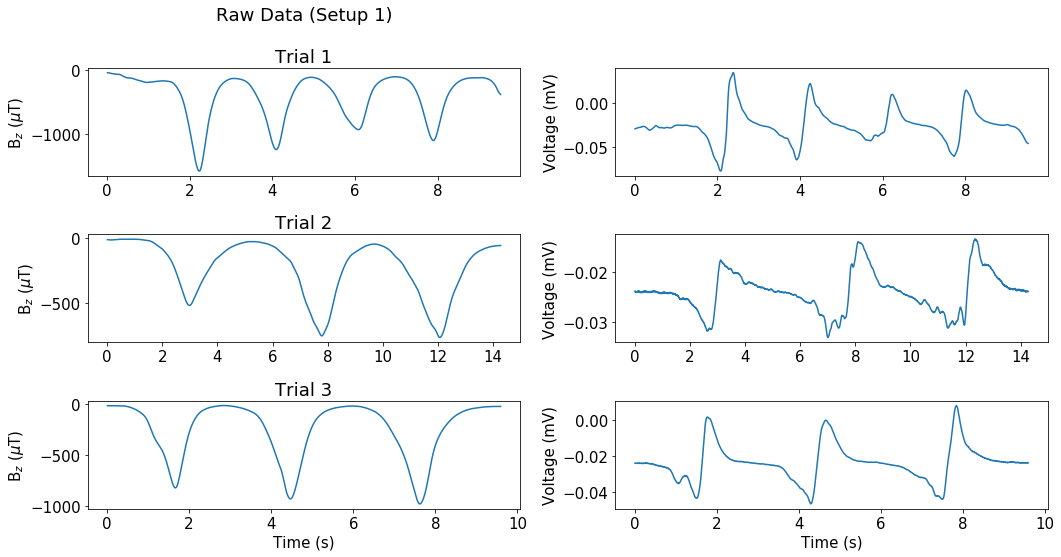

In [4]:
# Raw Data Visualization
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': '15'})

plt.subplot(321)
plt.title('Raw Data (Setup 1)\n\nTrial 1')
plt.ylabel('B$_z$ ($\mu$T)')
plt.plot(time1_1_data,bz1_1_data)

plt.subplot(322)
plt.ylabel('Voltage (mV)')
plt.plot(time1_1_data,voltage1_1_data)

plt.subplot(323)
plt.plot(time1_2_data,bz1_2_data)
plt.title('Trial 2')
plt.ylabel('B$_z$ ($\mu$T)')

plt.subplot(324)
plt.ylabel('Voltage (mV)')
plt.plot(time1_2_data,voltage1_2_data)

plt.subplot(325)
plt.plot(time1_3_data,bz1_3_data)
plt.title('Trial 3')
plt.ylabel('B$_z$ ($\mu$T)')
plt.xlabel('Time (s)')

plt.subplot(326)
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.plot(time1_3_data,voltage1_3_data)

plt.tight_layout()
plt.show()

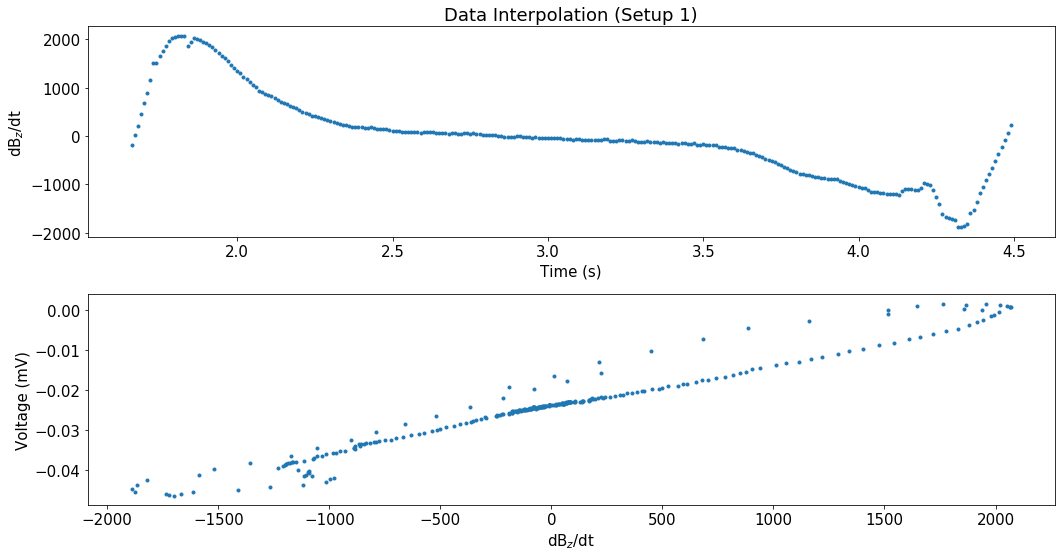

In [5]:
# Data Interpolation
t1, dbz1, v1, bz1 = crop_data(time1_3_data, bz1_3_data, voltage1_3_data, 1.65, 4.5)

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t1,dbz1,'.')
plt.title('Data Interpolation (Setup 1)')
plt.xlabel('Time (s)')
plt.ylabel('dB$_z$/dt')

plt.subplot(212)
plt.plot(dbz1,v1,'.')
plt.xlabel('dB$_z$/dt')
plt.ylabel('Voltage (mV)')
plt.tight_layout()
plt.show()

#### SETUP 1: Data Analysis
As expected by Faraday's law, the graph looks relatively linear. The expected value for the slope of our graph can calculated via Faraday's law:
$$\varepsilon = -Na \frac{dB_z}{dt}$$
Where N is the number of loops of our coil, and a is the area of our coil. The slope, accordingly, will be:
$$slope = -Na = -(20)(\pi * .01^2) = -0.0063 \frac{[V][s]}{[T]} = -0.0000063 \frac{[mV][s]}{[\mu T]}$$
Our measured slope is .00001 milliVolt seconds per microTesla. The reason for the sign discrepancy is our choice of the G+ and G- ports for our coil's end. Therefore, we will ignore the sign difference.

Error propogation:
$$\delta_{actual} = actual * \sqrt{\frac{\delta_{M}}{M}^2 + \frac{\delta_{N}}{N}^2}$$
$$\delta_{actual} = .0000063 * \sqrt{2 * \frac{.005}{.01}^2 + \frac{1}{20}^2}$$
$$\delta_{actual} = .0000045$$

Agreement test:
$$|expected - actual| < 2\sqrt{\delta_{expected}^2 * \delta_{actual}^2}$$
$$|.0000063 - .00001208| < 2\sqrt{.00000015^2 * .0000045^2}$$
$$0.00000578 < .0000090$$
Our values do agree.

#### SETUP 2: Damped Harmonic Oscillator
Directly test Faraday’s law, this time using a spring setup. This design was likely provided so the graphs would be more consistent than the setup above, where shaky hands could decrease the accuracy of the data.

1. Tape coil so it surrounds the IOLab’s y-axis magnetometer.
1. Set up stand according to the lab manual.
1. Attach spring to IOLab (the attachment point should be on the side of the IOLab opposite the y-axis magnetometer).
1. Slide spring’s looped end onto stand. The IOLab should hang roughly 15 cm above the magnet at its equilibrium point.
   (*Note: This is a relatively arbitrary choice of height. Like in setup 1, we wanted to avoid oversaturation of the magnetometer, and we chose an appropriate starting height. For springs with higher spring constants, the height may be lowered, and for springs with lower spring constants, the height should be accordingly increased*)
1. Pull the IOLab down roughly 10 cm and record data as it begins oscillate.

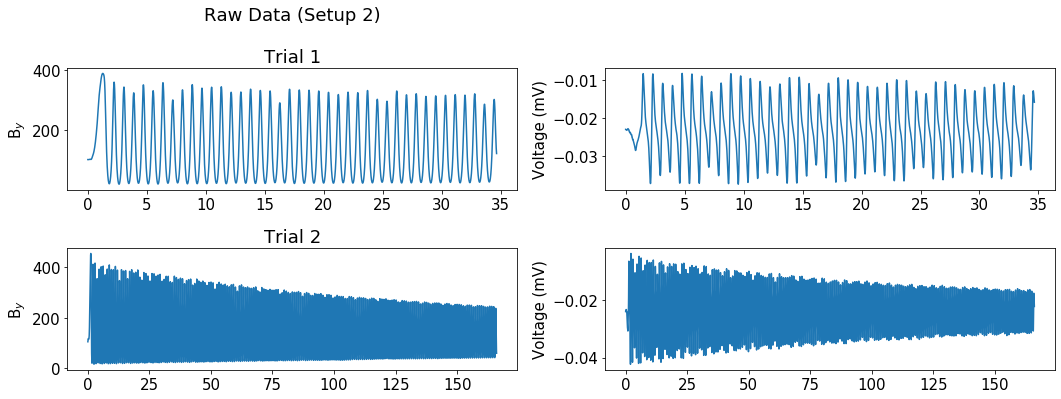

In [6]:
# Raw Data Visualization
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': '15'})

plt.subplot(321)
plt.title('Raw Data (Setup 2)\n\nTrial 1')
plt.ylabel('B$_y$')
plt.plot(time2_1_data,by2_1_data)

plt.subplot(322)
plt.ylabel('Voltage (mV)')
plt.plot(time2_1_data,voltage2_1_data)

plt.subplot(323)
plt.plot(time2_2_data,by2_2_data)
plt.title('Trial 2')
plt.ylabel('B$_y$')

plt.subplot(324)
plt.ylabel('Voltage (mV)')
plt.plot(time2_2_data,voltage2_2_data)

plt.tight_layout()
plt.show()

In [2]:
# Data Interpolation
t2, dby2, v2, by2 = crop_data(time2_1_data, by2_1_data, voltage2_1_data, 5.1,6)

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t2,dby2,'.')
plt.title('Data Interpolation (Setup 2)')
plt.xlabel('Time (s)')
plt.ylabel('dB$_y$/dt')

plt.subplot(212)
plt.plot(dby2,v2,'.')
plt.xlabel('dB$_y$/dt')
plt.ylabel('Voltage (mV)')
plt.tight_layout()
plt.show()

NameError: name 'crop_data' is not defined

#### SETUP 2: Data Analysis
As with the first setup, the graph looks relatively linear. The expected value for the slope of our graph can calculated via Faraday's law, and is the same as before, as our coil did not change.
$$\varepsilon = -Na \frac{dB_z}{dt}$$
Where N is the number of loops of our coil, and a is the area of our coil. The slope, accordingly, will be:
$$slope = -Na = -(20)(\pi * .01^2) = -0.0063 \frac{[V][s]}{[T]} = -0.0000063 \frac{[mV][s]}{[\mu T]}$$
Our measured slope is -.000009 milliVolt seconds per microTesla.

Error propogation:
$$\delta_{actual} = actual * \sqrt{\frac{\delta_{M}}{M}^2 + \frac{\delta_{N}}{N}^2}$$
$$\delta_{actual} = .0000063 * \sqrt{2 * \frac{.005}{.01}^2 + \frac{1}{20}^2}$$
$$\delta_{actual} = .0000045$$

Agreement test:
$$|expected - actual| < 2\sqrt{\delta_{expected}^2 * \delta_{actual}^2}$$
$$|.0000063 - .000009| < 2\sqrt{.00000028^2 * .0000045^2}$$
$$.0000027 < .0000090$$
Our values do agree.

#### SETUP 3: Our Setup
Directly test Faraday’s law, this time using our own setup. This setup is similar to case 2, however we will place the magnet on the spring (making it part of the spring mass) and place the IOLab and magnetometer on the lab bench.
1. Set up stand in the same manner as case 2
1. Hang spring from stand’s crossbar
1. Hook a weight basket through the bottom of the spring.
1. Make a roll of tape (s. t. the outside of the roll is sticky), tape one neodymium magnet to the bottom of the basket
1. Place the IOLab below the magnet. Either the z-axis or y-axis magnetometer would be sufficient for data collection. We chose the y-axis magnetometer.
1. As with the previous cases, coil wire and hook it to the IOLab’s G+ and G- ports. We taped the coil of wire around the y-axis magnetometer.
1. Pull down the spring slightly, and let oscillate above the magnetometer.
1. Record data

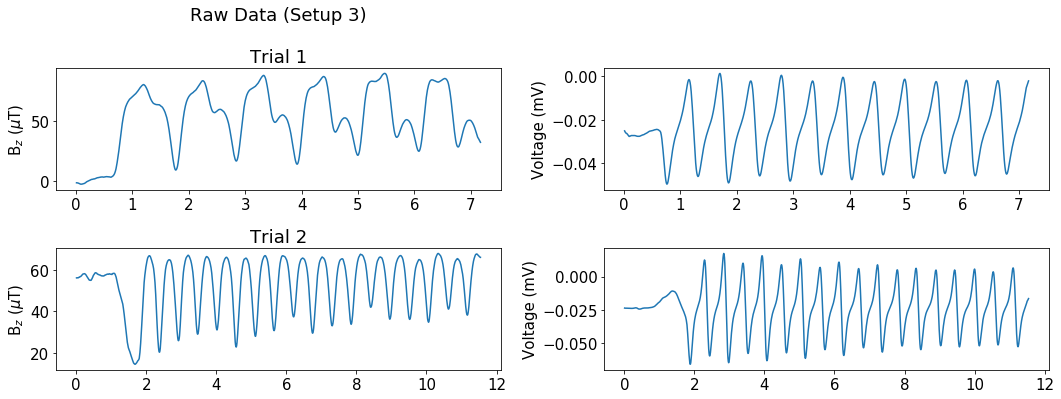

In [8]:
# Raw Data Visualization
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': '15'})

plt.subplot(321)
plt.title('Raw Data (Setup 3)\n\nTrial 1')
plt.ylabel('B$_z$ ($\mu$T)')
plt.plot(time3_1_data,bz3_1_data)

plt.subplot(322)
plt.ylabel('Voltage (mV)')
plt.plot(time3_1_data,voltage3_1_data)

plt.subplot(323)
plt.plot(time3_2_data,bz3_2_data)
plt.title('Trial 2')
plt.ylabel('B$_z$ ($\mu$T)')

plt.subplot(324)
plt.ylabel('Voltage (mV)')
plt.plot(time3_2_data,voltage3_2_data)

plt.tight_layout()
plt.show()

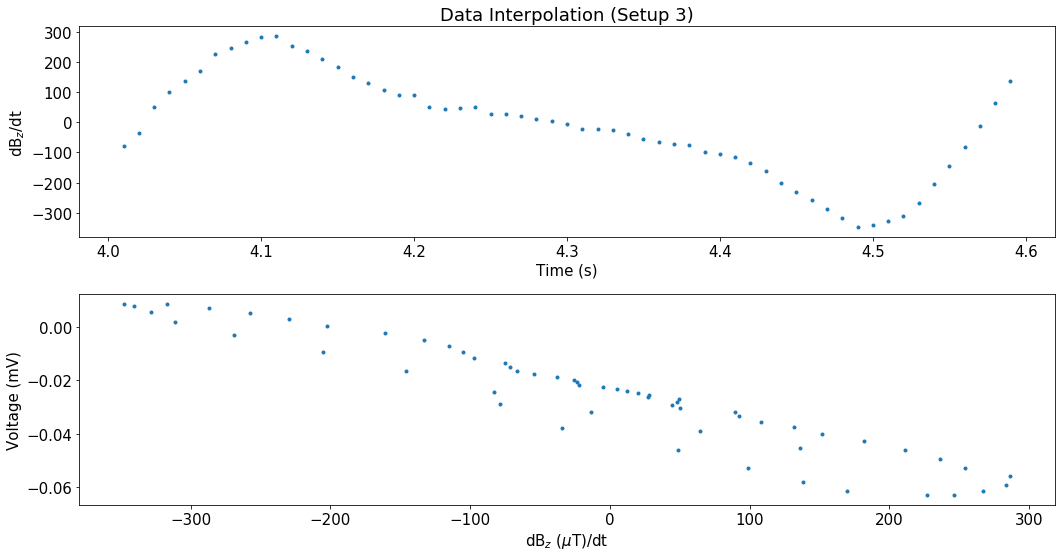

In [9]:
# Data Interpolation
t3, dbz3, v3, bz3 = crop_data(time3_2_data, bz3_2_data, voltage3_2_data, 4, 4.6)

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t3,dbz3,'.')
plt.title('Data Interpolation (Setup 3)')
plt.xlabel('Time (s)')
plt.ylabel('dB$_z$/dt')

plt.subplot(212)
plt.plot(dbz3,v3,'.')
plt.xlabel('dB$_z$ ($\mu$T)/dt')
plt.ylabel('Voltage (mV)')
plt.tight_layout()
plt.show()

#### SETUP 3: Data Analysis
As with the first two setups, the graph looks relatively linear. The expected value for the slope of our graph can calculated via Faraday's law, and is the same as before, as our coil did not change.
$$\varepsilon = -Na \frac{dB_z}{dt}$$
Where N is the number of loops of our coil, and a is the area of our coil. The slope, accordingly, will be:
$$slope = -Na = -(20)(\pi * .01^2) = -0.0063 \frac{[V][s]}{[T]} = -0.0000063 \frac{[mV][s]}{[\mu T]}$$
Our measured slope is -.00011 milliVolt seconds per microTesla.

Error propogation:
$$\delta_{actual} = actual * \sqrt{\frac{\delta_{M}}{M}^2 + \frac{\delta_{N}}{N}^2}$$
$$\delta_{actual} = .0000063 * \sqrt{2 * \frac{.005}{.01}^2 + \frac{1}{20}^2}$$
$$\delta_{actual} = .0000045$$

Agreement test:
$$|expected - actual| < 2\sqrt{\delta_{expected}^2 + \delta_{actual}^2}$$
$$|.0000063 - .00011| < 2\sqrt{.00000497^2 + .0000045^2}$$
$$.0001037 < .000013$$
Our values do not agree. The reasons for disagreement are varied, but one important source may be the motion of the magnet-weight-basket spring mass. If this mass did not oscillate purely in the y direction (up and down, perpendicular to the surface of the table), then there would be less change in magnetic field strength (as interpolated from the magnetometer data), due to the magnetic field now pointing at an angle w/respect to the coil. However, the voltage measured by the high gain may be unaffected by the off-axis oscillation. As a result, one would calculate a higher slope from plotting the electromotive force versus the change in magnetic field over time. 

#### SETUP 4: Eddy-Current Damping
1. Set up stand in the same manner as case 2
1. Hang spring from stand’s crossbar
1. Place large neodymium magnet adjacent to the spring mass's height.
1. Pull IOLab down, let oscillate, and record data. This is our control trial.
1. Tape soda can to the bottom of the IOLab, on the side opposite that of the y-axis magnetometer. Either the top or the bottom should be taped to the IOLab, not the lateral side.
1. Attach IOLab to the spring. Let hang at equilibrium.
1. Place large neodymium magnet adjacent to the spring mass's height.
1. Pull IOLab down, let oscillate, and record data. This is our experimental trial.

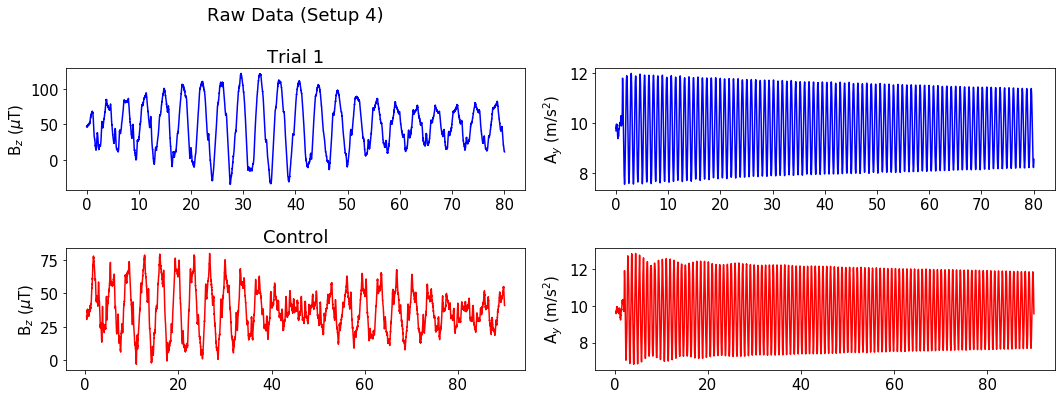

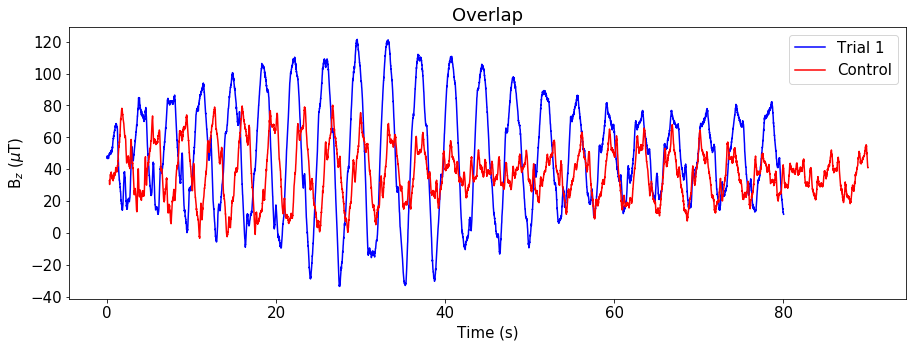

In [66]:
# Raw Data Visualization
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': '15'})

plt.subplot(321)
plt.title('Raw Data (Setup 4)\n\nTrial 1')
plt.ylabel('B$_z$ ($\mu$T)')
plt.plot(time4_1_data,bz4_1_data,'b-')

plt.subplot(322)
plt.ylabel('A$_y$ (m/s$^2$)')
plt.plot(time4_1_data,ay4_1_data,'b-')

plt.subplot(323)
plt.plot(time4_control_data,bz4_control_data,'r-')
plt.title('Control')
plt.ylabel('B$_z$ ($\mu$T)')

plt.subplot(324)
plt.ylabel('A$_y$ (m/s$^2$)')
plt.plot(time4_control_data,ay4_control_data,'r-')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(time4_1_data,bz4_1_data,'b-',label='Trial 1')
plt.plot(time4_control_data,bz4_control_data,'r-',label='Control')
plt.title('Overlap')
plt.xlabel('Time (s)')
plt.ylabel('B$_z$ ($\mu$T)')
plt.legend()
plt.show()

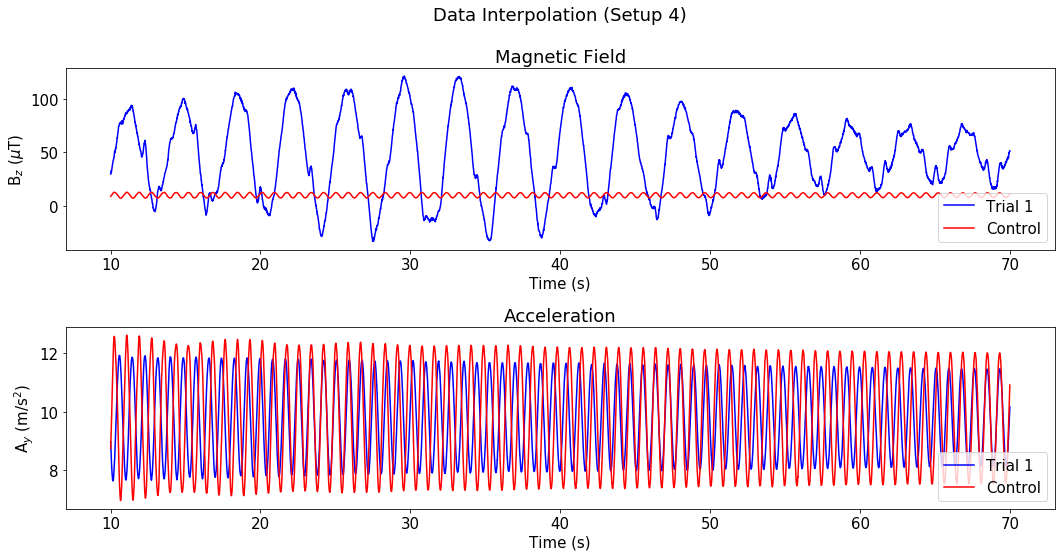

In [64]:
# Data Interpolation
t4, day4, bz4, ay4 = crop_data(time4_1_data, ay4_1_data, bz4_1_data, 10, 70)
t4_control, day4_control, bz4_control, ay4_control = crop_data(time4_control_data, ay4_control_data, bz4_control_data, 10, 70)

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t4,bz4,'b-',label='Trial 1')
plt.plot(t4_control,ay4_control,'r-',label='Control')
plt.title('Data Interpolation (Setup 4)\n\nMagnetic Field')
plt.xlabel('Time (s)')
plt.ylabel('B$_z$ ($\mu$T)')
plt.legend(loc='lower right')

plt.subplot(212)
plt.plot(t4,ay4,'b-',label='Trial 1')
plt.plot(t4_control,ay4_control,'r-',label='Control')
plt.title('Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('A$_y$ (m/s$^2$)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### SETUP 4: (Brief) Data Analysis
*A rigorous data analysis was not required for case 3, the exploration of eddy currents, but here are some of the observations we noticed in our admittedly brief exploration of eddy currents:

Our setup was quite simple: tape a soda can to the bottom of the eddy current in the y-axis direction. Place the IOLab-soda can at the end of the spring (identical to case 2), and place a magnet on the stand, s. t. it is at the same height as the soda can when the can is at equilibrium. We ran a control trial of the spring mass oscillating without any eddy currents by removing the can from the IOLab (the magnet was placed at equilibrium height for both trials), then compared that data set to the spring mass oscillating with the magnet on the stand. In order to analyze our data, we plotted the measured magnetic field (in Teslas) versus time, and compared the two oscillations. The damping constant found for the control trial was .00306109, while the damping constant found for the experimental trial was .00409078. This difference may be significant, as the difference in trials due to mass can nearly be neglected (because the combined mass of the tape and soda can should not significantly change the damping constant). Our larger damping constant may be attributed to the eddy current and opposing magnetic field created by the presence of the large conductor taped to the bottom of the IOLab.

#### SETUP 5: Build Your Own Motor

Build a lorentz motor. This was strangely difficult, but after some trial and error, we managed to start a working motor. This was our base setup:
1. Hook two paper clips into corkboard in order to create a “stand”
1. Loop a length of wire roughly 15 times, leaving room at the end to balance the loop between the two paper clips.
1. Place two neodymium magnets below the coil
1. Hook the paper clips to a magnet, the positive to one paper clip stand, the negative to the other paper clip stand.

This was the basic arrangement, however it took us roughly an hour of testing to get a working motor. Eventually, these steps proved helpful:
- Using sandpaper, rub the coating of the wire off one half of one end of the coil’s end, and do the same for the other end of the coil. Remove coating of the coil ends all the way until the coil begins.
- Moving the coil/motor as close to the magnet(s) as possible. This increases the magnetic flux through the coil, and the corresponding Lorentz force.
- Checking the voltage of the battery. If necessary, hook batteries in series. The voltage that we required for our motor was 9 volts.

<img src="https://github.com/stephaniebie/T2-Faraday/blob/master/motor.JPG?raw=true">
<center><i>Final Motor Design</i></center>

## Data Analysis

### Error Propagation / Derivations
[latex stuff lol]

In [116]:
plt.rcParams.update({'font.size': '15'})

# Original code by Stephanie Bie with inspiration from Professor Kolomensky (Physics 77/88)
# Linear model
def model(x,a,b):
    return a*x + b

# Fits data to model
def fitting(x, y, title, xlabel, ylabel):
    par0 = np.array([0.5,-0.3])
    par, cov = fitter.curve_fit(model, x, y, par0)
    a = par[0]
    ea = np.sqrt(cov[0,0])
    b = par[1]
    eb = np.sqrt(cov[1,1])
    xfit = np.linspace(min(x),max(x),50)
    
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    plt.scatter(x, y, color='k')
    plt.plot(xfit,model(xfit,*par),color='orange')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.subplot(222)
    residuals = [y[i] - model(np.array(x),*par)[i] for i in range(len(y))]
    plt.plot(x, residuals, 'go')
    plt.axhline(color = 'k', alpha = 0.3)
    plt.title('\nResidual Plot')
    plt.xlabel('%s\n\n\ny = ax + b\na = %.8f $\pm$ %.8f\nb = %.8f $\pm$ %.8f' % (xlabel,a,ea,b,eb))
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()
    
    #print('Agreement test:')
    #agree(bleh,bleh,bleh,bleh)
    
# Agreement Test
def agree(theoretical, dt, experimental, de):
    if abs(theoretical - experimental) < 2 * np.sqrt(dt**2 + de**2):
        print('\tThe experimental value ({:.5f} \u00B1 {:.5f}) agrees with the theoretical value ({:.5f} \u00B1 {:.5f}).'.format(experimental,de,theoretical,dt))
    else:
        print('\tThe experimental value ({:.5f} \u00B1 {:.5f}) does not agree with the theoretical value ({:.5f} \u00B1 {:.5f}).'.format(experimental,de,theoretical,dt))

### SETUP 1: Coil Making

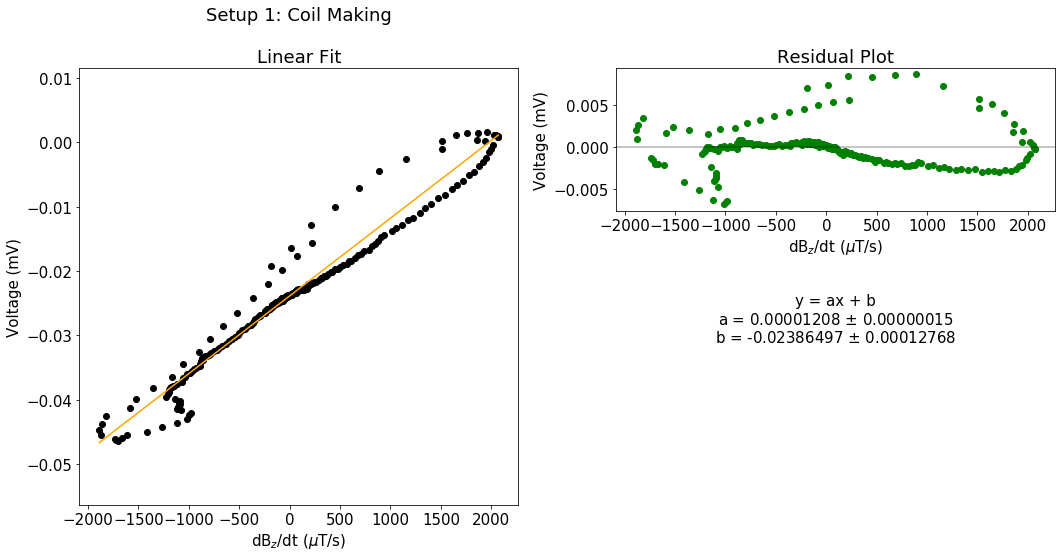

In [117]:
fitting(dbz1,v1,'Setup 1: Coil Making\n\nLinear Fit','dB$_z$/dt ($\mu$T/s)','Voltage (mV)')

[setup 1 discussion]

### SETUP 2: Damped Harmonic Oscillator

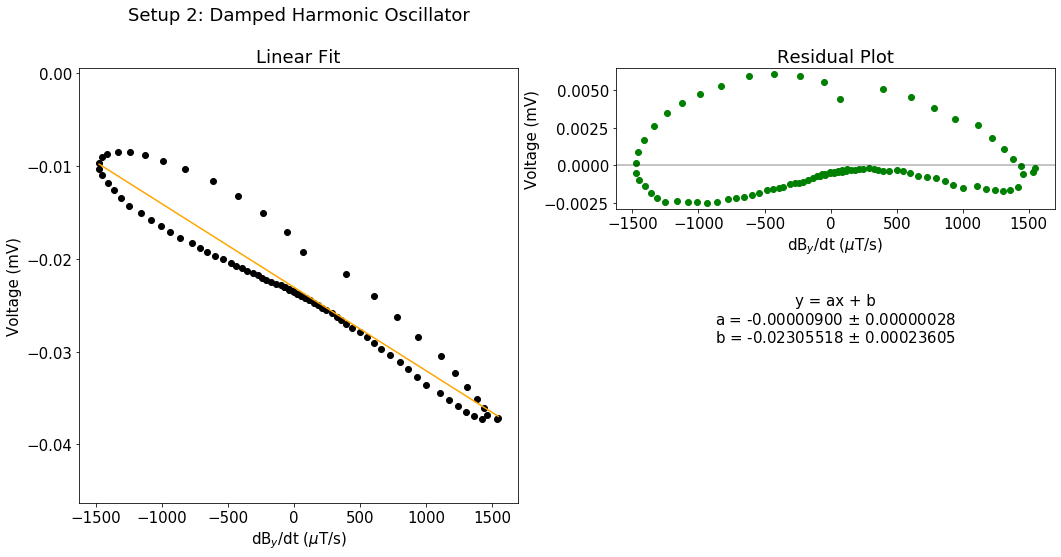

In [118]:
fitting(dby2,v2,'Setup 2: Damped Harmonic Oscillator\n\nLinear Fit','dB$_y$/dt ($\mu$T/s)','Voltage (mV)')

[setup 2 discussion]

### SETUP 3: Our Setup

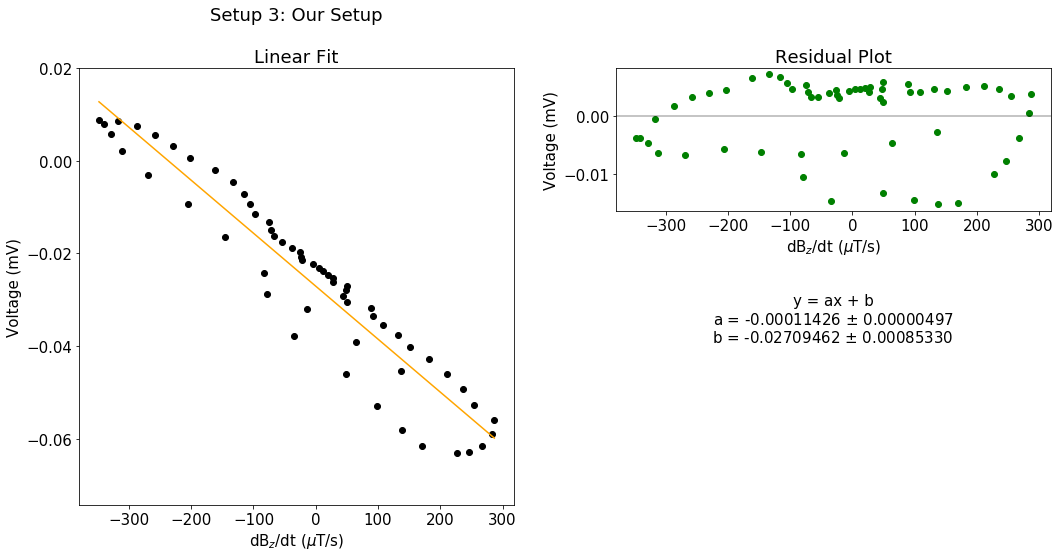

In [119]:
fitting(dbz3,v3,'Setup 3: Our Setup\n\nLinear Fit','dB$_z$/dt ($\mu$T/s)','Voltage (mV)')

[setup 3 discussion]

### SETUP 4: Eddy-Current Damping

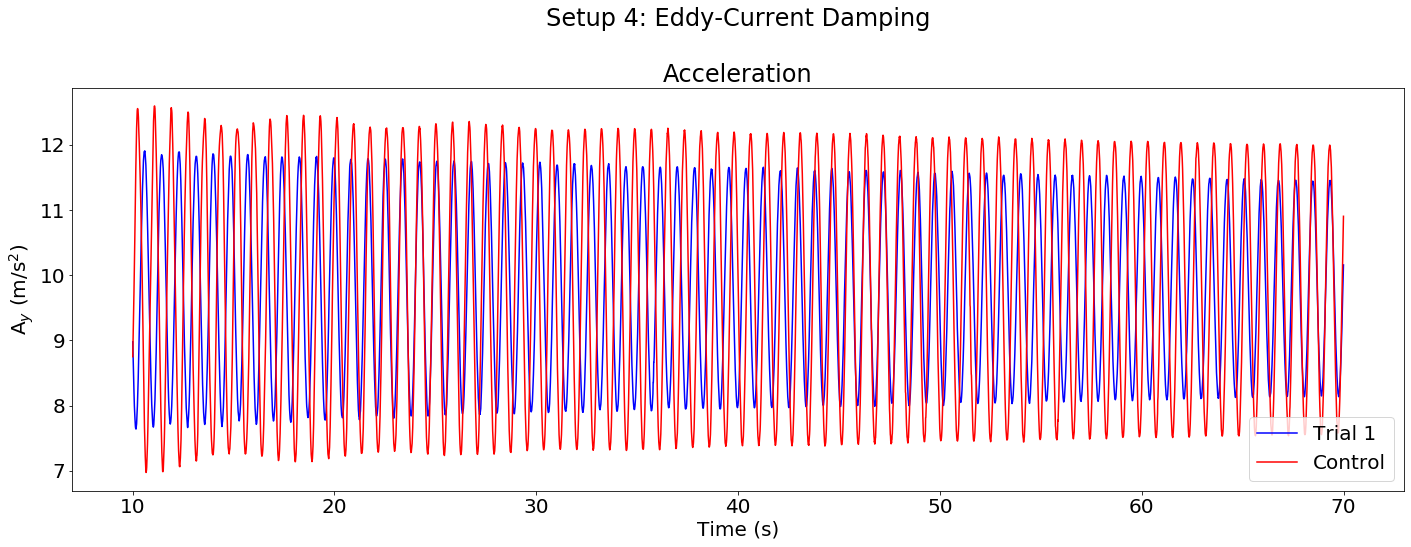

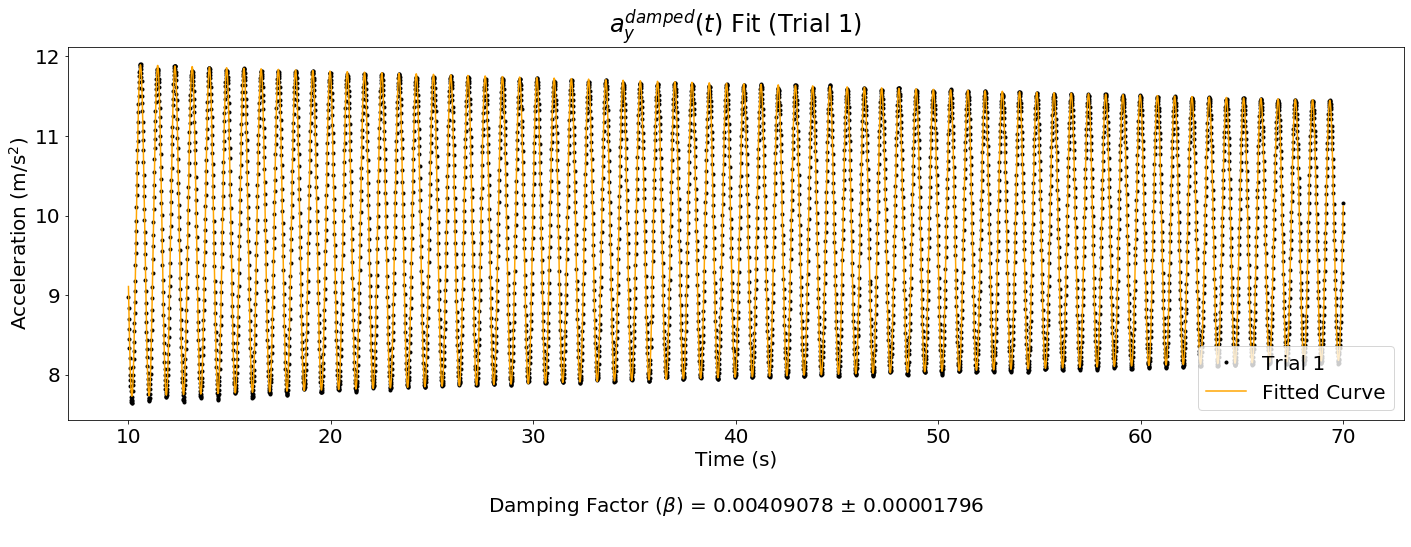

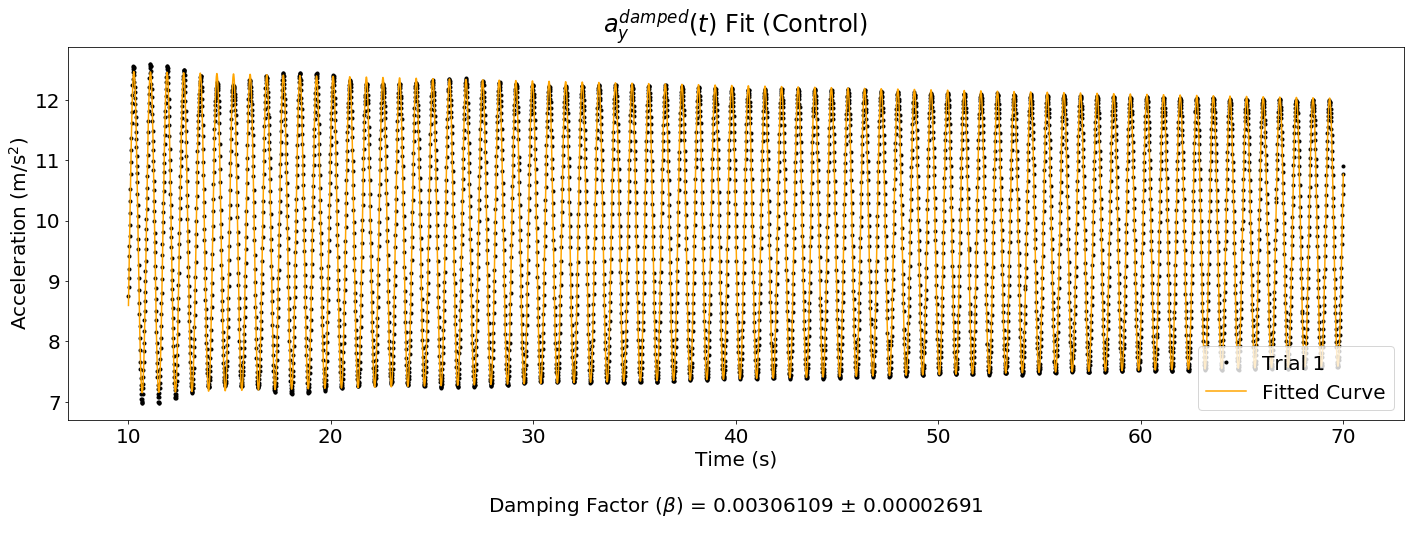

In [123]:
import scipy.optimize as opt
plt.rcParams.update({'font.size': '20'})

def vdamped_a(t, A, B, w, phi, beta):
    return B + A * np.exp(-beta*t) * ((beta**2-w**2)*np.cos(w*t + phi)+2*beta*w*np.sin(w*t+phi))

def damped_fit(t,y,title):
    pars, cov = opt.curve_fit(vdamped_a, t-10, y, p0=[1, -10, 8, 1, 0.1])
    [A, B, w, phi, beta] = pars
    ebeta = np.sqrt(cov[4,4])
    plt.figure(figsize=(20,8))
    plt.plot(t, y, 'k.',label='Trial 1')
    plt.plot(t, vdamped_a(t-10, A, B, w, phi, beta), color='orange',label='Fitted Curve')
    plt.title('$a^{damped}_y (t)$ Fit (%s)' % title)
    plt.xlabel("Time (s)\n\nDamping Factor ($\\beta$) = {:.8f} $\pm$ {:.8f}\n".format(beta,ebeta))
    plt.ylabel("Acceleration (m/s$^2$)")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    
plt.figure(figsize=(20,8))
plt.title('Setup 4: Eddy-Current Damping\n\nAcceleration')
plt.xlabel('Time (s)')
plt.ylabel('A$_y$ (m/s$^2$)')
plt.plot(t4,ay4,'b-',label='Trial 1')
plt.plot(t4_control,ay4_control,'r-',label='Control')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

damped_fit(t4,ay4,'Trial 1')
damped_fit(t4_control,ay4_control,'Control')

[setup 4 discussion]

### SETUP 5: Data Analysis
Our motor ran at roughly 700 rpm.


## Summary / Conclusion
In our exploration of Faraday's Law, we used three different setups to directly verify the law. The first two setups were given by the lab manual, and led to us successfully verifying Faraday's law (at least by the standards of an agreement test). However, the third setup, in which we designed our own arrangement to directly test Faraday's law, was less successful. Our measured value was much larger than the expected value, which may have resulted from off-axis oscillation by our spring mass. In setup 4, we explored the effects of eddy currents on the oscillation of a spring mass, and observed that our dampening constant for the oscillation of our IOLab with the soda can (allowing for eddy currents) was larger than the dampening constant for our control trial. In setup 5, we designed and troubleshot a Lorentz motor. After some time adjusting the distance of our motor from our magnet, our magnet strength, the conductivity of our motor coil, and the battery strength, we successfully created a motor that ran at roughly 700 rpm.

## Appendix
_(excerpts from our lab notebook with additional notes not included in this report)_